# Project Introduction

<font size=4, face="Calibri">
This is a comprehensive data science project for the Final of WISERCLUB 2019-2020. <br/>
The project is about **<font>Business Analytics<font/>** and **<font>Data Mining</font>**. It consists of three parts: <br/>
&emsp;&emsp;Part 1: Explorative Data Analysis <br/>
&emsp;&emsp;Part 2: Data Preprocessing <br/>
&emsp;&emsp;Part 3: Model Training and Prediction <br/>
Each part has seversal problems. We have got two csv files, named *<font>data.csv</font>* and *<font>holiday.csv</font>*, derived from<br/> a new retail specialty coffee operator. The task is to use data and models to find hidden information.
</font>

## Packages used in the project

<font size=4, face="Calibri">
pandas, numpy, matplotlib, scipy, math, datetime, sklearn, xgboost, imblearn
</font>

## Methods used in the project

<font size=4, face="Calibri">
Aggregate Functions (groupby in Pandas), Hypothesis Testing (T test, F test), String Format, Lambda Expression, <br/>
Adaboost, Random Forest, Cross Validation, Xgboost, GridSearchCV, Oversampling 
</font>

<font color='red'>
<font size=4, face="Calibri">
Now, let's begin the exploration in the ocean of data.<br/>
    Since the project is very informative, you can use the contents of Jupyter Notebook to help you locate and read for convenience.
</font>

# <font color='#6495ED'>Part 1: Explorative Data Analysis</font>

<font size=4, face="Calibri">
    
1.	Find the time span of the order data. <br/>

2.	Find the number of orders each day. <br/>
&emsp;a.	<font color = blue>Boss: we need to design two different strategies for sales in workdays and sales in weekends.</font> <br/> &emsp;&emsp;True or False? Explain. <br/>

3.	Find the number of users. <br/>

4.	Find ten commodities with the highest sales and draw graphs with x-axis the commodity name and y-axis<br/> &emsp;the # of orders. <br/>

5.  Find the discount rate of each order and concat it onto the original dataset with column name *<font>discount_rate</font>*.<br/>&emsp;You may use *<font>pay_money</font>*, *<font>coffeestore_share_money</font>*, *<font>commodity_origin_money</font>* and *<font>commodity_income</font>*. <br/>

6.	Find the average discount of each week. One week should consist of Sunday to Saturday. <br/>

7.	Find the *<font>Retention Rate</font>* of any five days. It is the ratio of users purchasing again on the next day. <br/>&emsp;For example, if you want to compute the *<font>Retention Rate</font>* on 2019-02-10, then you need to find users who <br/>&emsp;bought goods on 02-09 and 02-10. <br/>

8. Find the *<font>Week Retention Rate</font>* of any day, which means finding users buying at that day and buying again <br/>&emsp;within the next seven days. <br/>

9. Find the *<font>Week Retention Rate</font>* of any day for *<font>new users</font>*  , which means finding users buying at that day <br/>&emsp;*<font>for the first time</font>*  and buying again within the next seven days. <br/>

10. Find the *<font>Retention Rate</font>* *<font>WITHIN</font>* one week of new users. You could choose any week you want, but it must <br/> &emsp;&ensp;consist of Sunday to Saturday. You need to find users buying the first product and buying again within that week. <br/>

11. Find “Active Users” (which means the number of orders of one user is greater equal to 5). <br/>

12. Write the table you get in 11 as a csv file with filename *<font>ActiveUser.csv</font>*. <br/>

13. Provide a description of the number of orders for each active user (# of ActiveUser, mean, range, std, variance,<br/>&emsp;&ensp;skewness and kurtosis). 
</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'SimHei'

In [2]:
Data = pd.read_csv("data.csv", encoding = "UTF-8")
Data.head()

,Unnamed: 0,Unnamed: 0.1,dt,phone_no,member_id,commodity_code,commodity_name,commodity_origin_money,coupon_id,coupon_money,one_category_name,two_category_name,commodity_income,pay_money,coffeestore_share_money
0,0,0,2019-01-25,13901387938,14442,SP025,榛果拿铁,27.0,7045.0,19.44,饮品,现磨咖啡,7.56,7.56,0.0
1,1,1,2019-01-27,13901387938,14442,SP209,NFC鲜榨橙汁,24.0,NaN,0.00,饮品,鲜榨果蔬汁,0.00,0.00,0.0
2,2,2,2019-01-23,13901387938,14442,SP025,榛果拿铁,27.0,5589.0,22.14,饮品,现磨咖啡,4.86,4.86,0.0
3,3,3,2019-02-01,13901387938,14442,SP025,榛果拿铁,27.0,6604.0,19.44,饮品,现磨咖啡,7.56,7.56,0.0
4,4,4,2019-01-27,13901387938,14442,SP010,巧克力瑞纳冰,27.0,6947.0,14.04,饮品,瑞纳冰,12.96,12.96,0.0


In [3]:
Holiday = pd.read_csv("holiday.csv", encoding = "UTF-8")
Holiday.head()

,dt,month,weekday,week_of_year,type,last_type,holiday_distance,holiday_code
0,2017-10-09,10,1,41,0,0,-82,0
1,2017-10-10,10,2,41,0,0,-81,0
2,2017-10-11,10,3,41,0,0,-80,0
3,2017-10-12,10,4,41,0,0,-79,0
4,2017-10-13,10,5,41,0,0,-78,0


## Problem 1&emsp;Find the time span of the order data.

<font size=4>
**<font color='blue'>Method 1: groupby</font>**

In [4]:
Data.groupby('dt')[['dt']].count().head(1)

,dt
dt,
2019-01-20,69859


In [5]:
Data.groupby('dt')[['dt']].count().tail(1)

,dt
dt,
2019-03-01,53279


<font size=4>
**<font color='blue'>Method 2: loop</font>**

In [6]:
print('The time span of the order data:',Data['dt'].min(),'to', Data['dt'].max())

The time span of the order data: 2019-01-20 to 2019-03-01


## Problem 2&emsp;Find the number of orders each day.

In [7]:
dt_sales = Data.groupby('dt')[['member_id']].count()
dt_sales.columns = ['daily_orders']
print('The number of orders each day:')
dt_sales

The number of orders each day:


,daily_orders
dt,
2019-01-20,69859
2019-01-21,117686
2019-01-22,118409
2019-01-23,126331
2019-01-24,125764
2019-01-25,122092
2019-01-26,77779
2019-01-27,66399
2019-01-28,106025


### Problem 2-a&emsp;<font color = blue>Boss: we need to design two different strategies for sales in workdays and sales in weekends. </font>

**<font size=4, face="Calibri">Answer:</font>** 
<font size=4, face="Calibri">
True. As you can see from the data above, the orders in workdays are much greater than orders in weekends. Thus, different strategies for sales should be designed. Here are the relevant descriptive statistics and hypothesis testings.
</font>

#### <font color='red'>1. Separate weekdays and weekends</font>

In [8]:
Holiday =  Holiday[(Holiday['dt'] > '2019-01-19') & (Holiday['dt'] < '2019-03-02')] # Note: don't miss ()
Holiday.head()

,dt,month,weekday,week_of_year,type,last_type,holiday_distance,holiday_code
468,2019-01-20,1,7,3,1,0,-15,0
469,2019-01-21,1,1,4,0,0,-14,0
470,2019-01-22,1,2,4,0,0,-13,0
471,2019-01-23,1,3,4,0,0,-12,0
472,2019-01-24,1,4,4,0,0,-11,0


In [9]:
orders = Data.groupby('dt')[['dt']].count()
orders.columns = ['daily_orders']

holiday_weekday = Holiday['weekday']
holiday_weekday = holiday_weekday.to_frame()
holiday_weekday.index = Holiday['dt']
holiday_weekday.columns = ['weekday']

orders_day = pd.concat([orders, holiday_weekday], axis = 1)
orders_day.head()

,daily_orders,weekday
dt,,
2019-01-20,69859,7
2019-01-21,117686,1
2019-01-22,118409,2
2019-01-23,126331,3
2019-01-24,125764,4


In [10]:
orders_weekday = orders_day[orders_day['weekday'] < 6]
orders_weekend = orders_day[orders_day['weekday'] > 5]

#### <font color='red'>2. Descriptive statistics of weekdays and weekends</font>

In [11]:
desc_weekday = orders_weekday['daily_orders'].to_frame().describe()
desc_weekday.columns = ['daily_orders_weekday']
desc_weekend = orders_weekend['daily_orders'].to_frame().describe()
desc_weekend.columns = ['daily_orders_weekend']
pd.concat([desc_weekday, desc_weekend], axis = 1)

,daily_orders_weekday,daily_orders_weekend
count,30.000000,11.000000
mean,63317.433333,41121.090909
std,38163.933323,24806.559328
min,7113.000000,8241.000000
25%,49000.500000,26296.500000
50%,52038.500000,31964.000000
75%,100210.500000,65333.000000
max,126331.000000,77779.000000


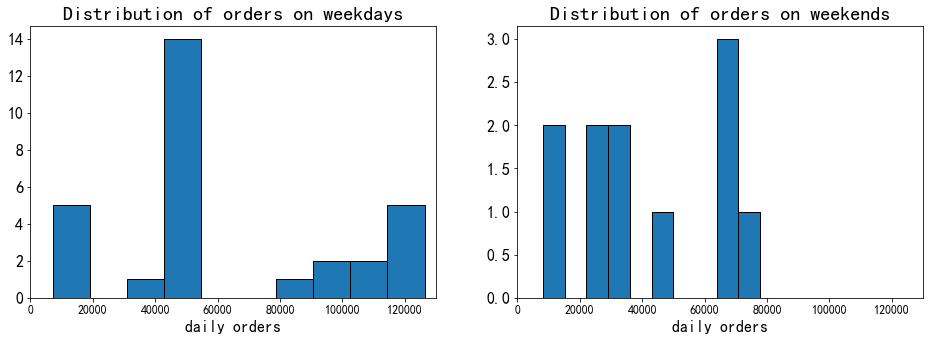

In [12]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
plt.hist(orders_weekday['daily_orders'], edgecolor='black')
plt.title('Distribution of orders on weekdays', fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 16)
plt.xlabel('daily orders', fontsize = 16)
plt.xlim(0, 130000)
plt.subplot(1,2,2)
plt.hist(orders_weekend['daily_orders'], edgecolor='black')
plt.title('Distribution of orders on weekends', fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 16)
plt.xlabel('daily orders', fontsize = 16)
plt.xlim(0, 130000)
plt.show()

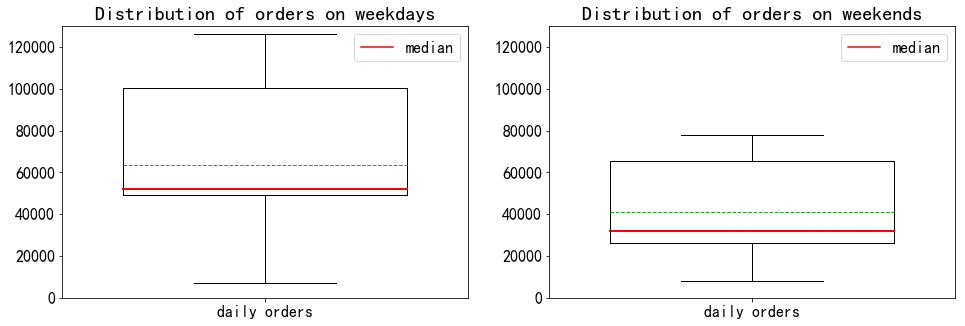

In [13]:
import matplotlib.lines as mlines

plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
plt.boxplot(orders_weekday['daily_orders'], widths = 0.7, labels = ['daily orders'],
            meanline = True, showmeans = True, medianprops = {'color': 'red', 'linewidth': '2'})
plt.title('Distribution of orders on weekdays', fontsize = 20)
plt.ylim(0, 130000)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
median_line = mlines.Line2D([], [], color = 'red', label = 'median')
plt.legend(handles=[median_line], fontsize=16)

plt.subplot(1,2,2)
plt.boxplot(orders_weekend['daily_orders'], widths = 0.7, labels = ['daily orders'], 
            meanline = True, showmeans = True, medianprops = {'color': 'red', 'linewidth': '2'})
plt.title('Distribution of orders on weekends', fontsize = 20)
plt.ylim(0, 130000)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(handles=[median_line], fontsize = 16)
plt.show()

#### <font color='red'>3. Test whether var(orders_weekday) = var(orders_weekend)</font>

In [14]:
orders_weekday_mean = orders_weekday['daily_orders'].mean()
orders_weekend_mean = orders_weekend['daily_orders'].mean()
orders_weekday_var = orders_weekday['daily_orders'].var()
orders_weekend_var = orders_weekend['daily_orders'].var()

n1 = len(orders_weekday)
n2 = len(orders_weekend)

<font size=4>
**<font color='blue'>Method 1: F Test</font>**

In [15]:
from scipy.stats import f

def ftest(n1, n2, var1, var2):
    '''
        F test
    '''
    F = var1 / var2
    p_value = 2 * min(f.sf(F, n1-1, n2-1), 1 - f.sf(F, n1-1, n2-1))
    print('F =',round(F, 6))
    print('critical_region:','F <',round(f.isf(0.975, 29, 10),6),'or','F >',round(f.isf(0.025, 29, 10),6))
    if p_value < 0.05:    # at the 5% signiﬁcance level
        print('p-value=',round(p_value, 6))
        print('Reject the hypothesis orders_weekday_var = orders_weekend_var.')
        print('Thus, orders_weekday_mean is not equal to orders_weekend_mean at 5% confidence level.')
    else:
        print('p-value=',round(p_value, 6))
        print('Accept the hypothesis orders_weekder_var = orders_weekend_var.')
        print('Thus, orders_weekday_mean = orders_weekend_mean at 5% confidence level.')

ftest(n1, n2, orders_weekday_var, orders_weekend_var)

F = 2.366863
critical_region: F < 0.39548 or F > 3.318587
p-value= 0.152171
Accept the hypothesis orders_weekder_var = orders_weekend_var.
Thus, orders_weekday_mean = orders_weekend_mean at 5% confidence level.


<font size=4>
**<font color='blue'>Method 2: Levene Test</font>**

In [16]:
from scipy import stats
'''
Levene test: Homogeneity test of variances
'''
leveneTestRes = stats.levene(orders_weekday['daily_orders'], orders_weekend['daily_orders'], center='median')
print('w-value=%6.4f, p-value=%6.4f' %leveneTestRes)

w-value=0.8195, p-value=0.3709


#### <font color='red'>4. Test whether mean(orders_weekday) = mean(orders_weekend)</font>

<font size=4>
**<font color='blue'>Method 1: Self-defining Two Sample T Test Function</font>**

In [17]:
# two sample t test with equal variance, one-sided
from scipy.stats import t

def ttest(n1, n2, mean1, mean2, var1, var2):
    '''
        two sample T test with equal unknown variance, one-sided
    '''
    sp2 = ((n1-1)*var1 + (n2-1)*var2)/(n1+n2-2) # sp2 = 1240813903.8532245
    T = (orders_weekday_mean - orders_weekend_mean) / ((sp2/n1+sp2/n2) ** 0.5)  # T  = 1.7876937920463836
    p_value = t.sf(T, n1+n2-2)
    print('T =',round(T, 6)) 
    print('critical_region:','T >',round(t.isf(0.05, n1+n2-2),6))
    if p_value < 0.05:    # at the 5% signiﬁcance level
        print('p-value=',round(p_value ,6))
        print('Reject the hypothesis orders_weekday_mean = orders_weekend_mean.')
        print('Thus, orders_weekday_mean > orders_weekend_mean at 5% confidence level.')
    else:
        print('p-value=',round(p_value ,6))
        print('Accept the hypothesis orders_weekday_mean = orders_weekend_mean.')
        print('Thus, orders_weekday_mean = orders_weekend_mean at 5% confidence level.')

ttest(n1, n2, orders_weekday_mean, orders_weekend_mean, orders_weekday_var, orders_weekend_var) 

T = 1.787694
critical_region: T > 1.684875
p-value= 0.040799
Reject the hypothesis orders_weekday_mean = orders_weekend_mean.
Thus, orders_weekday_mean > orders_weekend_mean at 5% confidence level.


<font size=4>
**<font color='blue'>Method 2: Two Sample T Test by using  'from scipy import stats'</font>**

In [18]:
# two-sided, 5% confidence level
tTestRes = stats.stats.ttest_ind(orders_weekday['daily_orders'], orders_weekend['daily_orders'], equal_var = True)
print('T-statistic=%6.4f, p-value=%6.4f' %tTestRes)

T-statistic=1.7877, p-value=0.0816


<font size=4, face="Calibri">
Though we cannot reject the hyphothesis that sales in workdays and sales in weekends are different at 5% confidence level for two-sided test, **<font>we can reject it at 5% confidence level for one-sided test</font>**. Thus, the sales in weekdays are higher than sales in weekends.
</font>

<font size=4, face="Calibri">
From the histograms and boxplots above, it is noted that the number of some daily orders are below 20000 both on weekdays and weekends. Looking up the corresponding dates in the calendar according to the specific data we get in Problem 2, we find that the dates with orders below 20000 is during the Spring Festival of 2019.
</font>

In [19]:
slice_orders_day = orders_day[orders_day['daily_orders'] < 20000]
slice_orders_day

,daily_orders,weekday
dt,,
2019-02-04,7113,1
2019-02-05,8516,2
2019-02-06,7769,3
2019-02-07,7655,4
2019-02-08,7822,5
2019-02-09,8452,6
2019-02-10,8241,7


<font size=4, face="Calibri">
From the table above, it can be considered that there is no difference between the number of orders on weekdays and weekends during the Spring Festival. This is a special case. However, after dropping the data during the Spring Festival, as you can see from the table and boxplots below, it is obvious that the difference between the number of orders on weekdays and weekends is significant. 
</font>

In [20]:
slice_orders_weekday = orders_weekday[orders_weekday['daily_orders'] > 20000]
slice_orders_weekend = orders_weekend[orders_weekend['daily_orders'] > 20000]
desc_slice_weekday = slice_orders_weekday['daily_orders'].to_frame().describe()
desc_slice_weekday.columns = ['daily_orders_weekday']
desc_slice_weekend = slice_orders_weekend['daily_orders'].to_frame().describe()
desc_slice_weekend.columns = ['daily_orders_weekend']
pd.concat([desc_slice_weekday, desc_slice_weekend], axis = 1)

,daily_orders_weekday,daily_orders_weekend
count,25.000000,9.000000
mean,74425.920000,48404.333333
std,31442.615071,20999.623199
min,40365.000000,25179.000000
25%,50789.000000,29672.000000
50%,53279.000000,43106.000000
75%,104704.000000,66399.000000
max,126331.000000,77779.000000


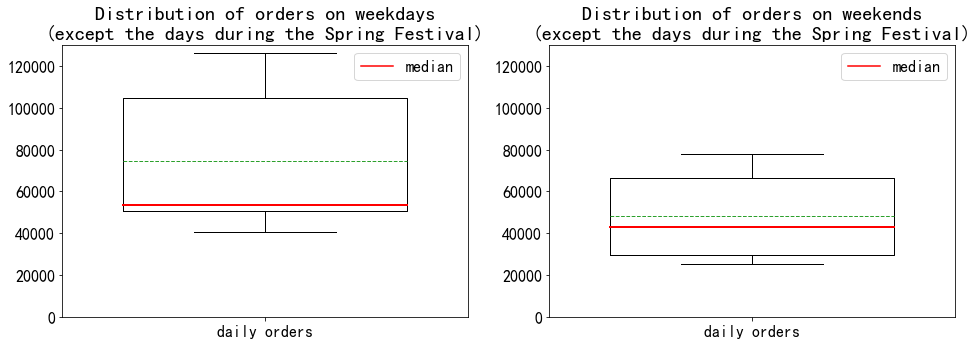

In [21]:
import matplotlib.lines as mlines

plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
plt.boxplot(slice_orders_weekday['daily_orders'], widths = 0.7, labels = ['daily orders'],
            meanline = True, showmeans = True, medianprops = {'color': 'red', 'linewidth': '2'})
plt.title('Distribution of orders on weekdays\n(except the days during the Spring Festival)', fontsize = 20)
plt.ylim(0, 130000)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
median_line = mlines.Line2D([], [], color = 'red', label = 'median')
plt.legend(handles=[median_line], fontsize=16)

plt.subplot(1,2,2)
plt.boxplot(slice_orders_weekend['daily_orders'], widths = 0.7, labels = ['daily orders'], 
            meanline = True, showmeans = True, medianprops = {'color': 'red', 'linewidth': '2'})
plt.title('Distribution of orders on weekends\n(except the days during the Spring Festival)', fontsize = 20)
plt.ylim(0, 130000)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(handles=[median_line], fontsize = 16)
plt.show()

<font size=4, face="Calibri">
We can also do the hypothesis testings to verify our conclusion.
</font>

In [22]:
n3 = len(slice_orders_weekday)
n4 = len(slice_orders_weekend)
slice_orders_weekday_mean = slice_orders_weekday['daily_orders'].mean()
slice_orders_weekend_mean = slice_orders_weekend['daily_orders'].mean()
slice_orders_weekday_var = slice_orders_weekday['daily_orders'].var()
slice_orders_weekend_var = slice_orders_weekend['daily_orders'].var()

print('(Except the days during the Spring Festival)')
ftest(n3, n4, slice_orders_weekday_var, slice_orders_weekend_var)

(Except the days during the Spring Festival)
F = 2.24189
critical_region: F < 0.39548 or F > 3.318587
p-value= 0.237908
Accept the hypothesis orders_weekder_var = orders_weekend_var.
Thus, orders_weekday_mean = orders_weekend_mean at 5% confidence level.


In [23]:
# two sample t test with equal variance, one-sided
print('(Except the days during the Spring Festival)')
ttest(n3, n4, slice_orders_weekday_mean, slice_orders_weekend_mean, slice_orders_weekday_var, slice_orders_weekend_var) 

(Except the days during the Spring Festival)
T = 1.956517
critical_region: T > 1.693889
p-value= 0.029589
Reject the hypothesis orders_weekday_mean = orders_weekend_mean.
Thus, orders_weekday_mean > orders_weekend_mean at 5% confidence level.


## Problem 3&emsp;Find the number of users.

In [24]:
user_num = len(Data.groupby('member_id')[['member_id']].count())
print('The number of users is', user_num)

The number of users is 466886


## Problem 4&emsp;Find ten commodities with the highest sales.  
<font size=4>**Draw graphs with x-axis the commodity name and y-axis the # of orders.</font>**

In [25]:
commodities = Data.groupby('commodity_name')[['commodity_name']].count()
commodities.columns = ['orders']  
top10_commodities = commodities.sort_values(by = ['orders'], ascending = False).head(10)
print('The ten commodities with the highest sales:')
top10_commodities

The ten commodities with the highest sales:


,orders
commodity_name,
拿铁,425514
榛果拿铁,219627
澳瑞白,155506
标准美式,148666
香草拿铁,136841
卡布奇诺,115475
摩卡,113754
加浓美式,110526
焦糖玛奇朵,105081


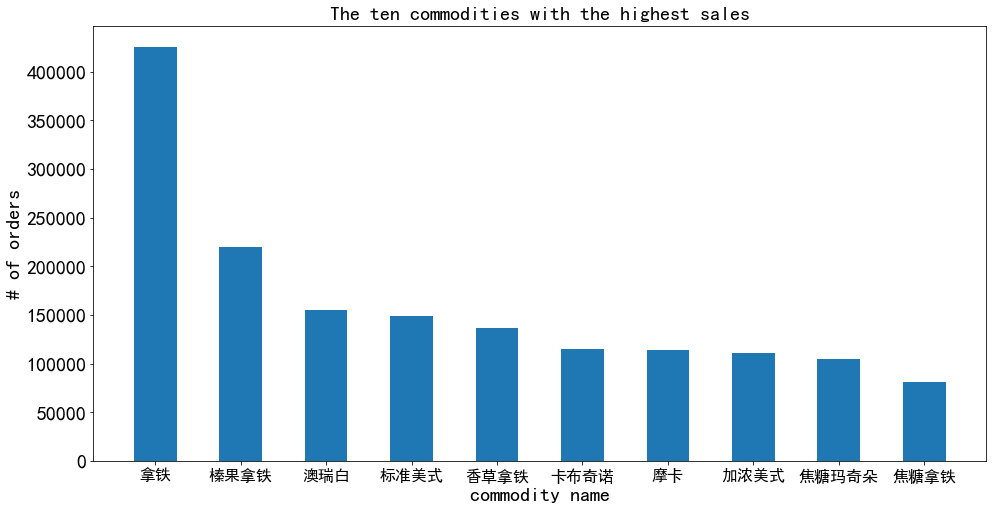

In [26]:
# top10_commodities.reset_index()
top10_commodities.insert(0, 'commodity_name', top10_commodities.index)
list_names = top10_commodities.commodity_name.tolist()
list_sales = top10_commodities.orders.tolist()
plt.figure(figsize = (16, 8))
plt.bar(list_names, height = list_sales, width = 0.5)
plt.title('The ten commodities with the highest sales', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 20)
plt.xlabel('commodity name', fontsize = 20)
plt.ylabel('# of orders', fontsize = 20)
plt.show()

## Problem 5&emsp;Find the discount rate of each order and concat it onto the original dataset with column name *<font>discount_rate</font>*.

In [27]:
discount_rate = Data.commodity_income / Data.commodity_origin_money # Series
discount_rate = discount_rate.to_frame()
discount_rate.columns=['discount_rate'] 
Data = pd.concat([Data, discount_rate], axis = 1)
Data.head()

,Unnamed: 0,Unnamed: 0.1,dt,phone_no,member_id,commodity_code,commodity_name,commodity_origin_money,coupon_id,coupon_money,one_category_name,two_category_name,commodity_income,pay_money,coffeestore_share_money,discount_rate
0,0,0,2019-01-25,13901387938,14442,SP025,榛果拿铁,27.0,7045.0,19.44,饮品,现磨咖啡,7.56,7.56,0.0,0.28
1,1,1,2019-01-27,13901387938,14442,SP209,NFC鲜榨橙汁,24.0,NaN,0.00,饮品,鲜榨果蔬汁,0.00,0.00,0.0,0.00
2,2,2,2019-01-23,13901387938,14442,SP025,榛果拿铁,27.0,5589.0,22.14,饮品,现磨咖啡,4.86,4.86,0.0,0.18
3,3,3,2019-02-01,13901387938,14442,SP025,榛果拿铁,27.0,6604.0,19.44,饮品,现磨咖啡,7.56,7.56,0.0,0.28
4,4,4,2019-01-27,13901387938,14442,SP010,巧克力瑞纳冰,27.0,6947.0,14.04,饮品,瑞纳冰,12.96,12.96,0.0,0.48


## Problem 6&emsp;Find the average discount of each week. (One week should consist of Sunday to Saturday.)

In [28]:
# find which seven days could be combined into one week
holiday_day = Holiday.groupby(['week_of_year'])[['week_of_year']].count()
holiday_day.columns = ['days']
holiday_day

,days
week_of_year,
3,1
4,7
5,7
6,7
7,7
8,7
9,5


In [29]:
holiday_week_of_year = Holiday['week_of_year']
holiday_week_of_year = holiday_week_of_year.to_frame()
holiday_week_of_year.index = Holiday['dt']
holiday_week_of_year.columns = ['week_of_year']

discount_rate_sum = Data.groupby('dt')[['discount_rate']].sum()
discount_rate_sum.columns = ['discount_rate_sum']

discount = pd.concat([dt_sales, discount_rate_sum, holiday_week_of_year], axis = 1)
discount.head()

,daily_orders,discount_rate_sum,week_of_year
dt,,,
2019-01-20,69859,25703.825175,3
2019-01-21,117686,44597.227917,4
2019-01-22,118409,44737.627817,4
2019-01-23,126331,47913.169124,4
2019-01-24,125764,48211.078974,4


In [30]:
average_discount = discount.groupby('week_of_year')['daily_orders', 'discount_rate_sum'].sum()
average_discount = average_discount[(average_discount.index > 3) & (average_discount.index < 9)] 
# Note: One week should consist of 7 days
discount_rate_weekly = average_discount.discount_rate_sum / average_discount.daily_orders # Series
discount_rate_weekly = discount_rate_weekly.to_frame()
discount_rate_weekly.columns=['discount_rate_weekly']
average_discount = pd.concat([average_discount, discount_rate_weekly], axis = 1)
average_discount.rename(columns = {"daily_orders": "weekly_orders"}, inplace = True)
average_discount

,weekly_orders,discount_rate_sum,discount_rate_weekly
week_of_year,,,
4,754460,286698.672087,0.380005
5,604308,241709.679206,0.399978
6,55568,19649.704967,0.353615
7,288267,135698.193614,0.470738
8,321885,149798.599166,0.465379


In [31]:
print('The average discount of each week:')
average_discount.drop(['weekly_orders','discount_rate_sum'], axis = 1, inplace = True)
average_discount

The average discount of each week:


,discount_rate_weekly
week_of_year,
4,0.380005
5,0.399978
6,0.353615
7,0.470738
8,0.465379


## Problem 7&emsp;Find the *<font>Retention Rate</font>* of any five days. It is the ratio of users purchasing again on the next day.

<font size=4, face="Calibri">
Here are three methods. Method 1 is easy to figure out but it is tedious. Method 2 is an improvement on Method 1.<br/> Method 3 is is an improvement on Method 2. It is recommended and more useful.
</font>

<font size=4>
**<font color='blue'>Method 1: Compute Retention Rate of given five days directly</font>**

In [32]:
# The conditions of the slice will change with the specific dates
# We use the example 2019-01-21 to 2019-01-25 
slice_0120a =  Data[Data['dt'] < '2019-01-21']                                 # 2019-01-20
slice_0121a =  Data[(Data['dt'] > '2019-01-20') & (Data['dt'] < '2019-01-22')] # 2019-01-21
slice_0122a =  Data[(Data['dt'] > '2019-01-21') & (Data['dt'] < '2019-01-23')] # 2019-01-22
slice_0123a =  Data[(Data['dt'] > '2019-01-22') & (Data['dt'] < '2019-01-24')] # 2019-01-23
slice_0124a =  Data[(Data['dt'] > '2019-01-23') & (Data['dt'] < '2019-01-25')] # 2019-01-24
slice_0125a =  Data[(Data['dt'] > '2019-01-24') & (Data['dt'] < '2019-01-26')] # 2019-01-25

slice_0120 = slice_0120a.drop_duplicates(subset = ['member_id'], keep = 'first', inplace = False)
slice_0121 = slice_0121a.drop_duplicates(subset = ['member_id'], keep = 'first', inplace = False)
slice_0122 = slice_0122a.drop_duplicates(subset = ['member_id'], keep = 'first', inplace = False)
slice_0123 = slice_0123a.drop_duplicates(subset = ['member_id'], keep = 'first', inplace = False)
slice_0124 = slice_0124a.drop_duplicates(subset = ['member_id'], keep = 'first', inplace = False)
slice_0125 = slice_0125a.drop_duplicates(subset = ['member_id'], keep = 'first', inplace = False)

print('The retention rate of 2019-01-21 to 2019-01-25:',
      round(len(slice_0120['member_id'].loc[slice_0120['member_id'].isin(slice_0121['member_id'])]) / len(slice_0120), 4),
      round(len(slice_0121['member_id'].loc[slice_0121['member_id'].isin(slice_0122['member_id'])]) / len(slice_0121), 4),
      round(len(slice_0122['member_id'].loc[slice_0122['member_id'].isin(slice_0123['member_id'])]) / len(slice_0122), 4),
      round(len(slice_0123['member_id'].loc[slice_0123['member_id'].isin(slice_0124['member_id'])]) / len(slice_0123), 4),
      round(len(slice_0124['member_id'].loc[slice_0124['member_id'].isin(slice_0125['member_id'])]) / len(slice_0124), 4))

The retention rate of 2019-01-21 to 2019-01-25: 0.1523 0.2463 0.2353 0.2278 0.221


<font size=4>
**<font color='blue'>Method 2:  Compute Retention Rate of given five days by using loop and 'format'</font>**

In [33]:
slice_dt_all = [] # slice Data by dt(date)
slice_dt_uni = [] # drop duplicates about users of slice_dt_all
num_user_buy = [] # number of users purchasing on that day
num_user_buy_again = [] # number of users purchasing again on the next day
retention_rate = [] # the ratio of users purchasing again on the next day

for j in range(6):
    # The conditions of the slice will change with the specific dates
    # We use the example 2019-01-21 to 2019-01-25 
    slice_dt_all.append(Data[(Data['dt'] > '2019-01-{}'.format(j+19)) & (Data['dt'] < '2019-01-{}'.format(j+21))])
    slice_dt_uni.append(slice_dt_all[j].drop_duplicates(subset = ['member_id'], keep = 'first', inplace = False))
    num_user_buy.append(len(slice_dt_uni[j]))
    if j > 0:
        user_buy_again = slice_dt_uni[j-1].member_id.loc[slice_dt_uni[j-1].member_id.isin(slice_dt_uni[j].member_id)]
        num_user_buy_again.append(len(user_buy_again))
        if num_user_buy[j-1] == 0:
            print('There are no users purchasing again on the next day!'
                  'Thus, the retention rate of this day cannot be computed!')
            break
        retention_rate.append(round(num_user_buy_again[j-1] / num_user_buy[j-1], 4))
      
print('The retention rate of 2019-01-21 to 2019-01-25:', ', '.join(str(i) for i in retention_rate)) 

The retention rate of 2019-01-21 to 2019-01-25: 0.1523, 0.2463, 0.2353, 0.2278, 0.221


<font size=4>
**<font color='blue'>Method 3: Compute Retention Rate of any five days by using loop and 'import datetime'</font>**

In [34]:
import datetime

slice_dt_all = [] # slice Data by dt(date)
slice_dt_uni = [] # drop duplicates about users of slice_dt_all
num_user_buy = [] # number of users purchasing on that day
num_user_buy_again = [] # number of users purchasing again on the next day
retention_rate = [] # the ratio of users purchasing again on the next day

first_dt = input('Please enter the first day that you want to compute the retention rate (from 2019-01-21 to 2019-02-25): ')
date = datetime.datetime.strptime(first_dt, '%Y-%m-%d')

if date <= datetime.datetime(2019, 1, 20, 0, 0) or date > datetime.datetime(2019, 2, 25, 0, 0):
    last_date = date + datetime.timedelta(days=4) 
    last_dt = last_date.strftime("%Y-%m-%d")
    print('The retention rate of {} to {}'.format(first_dt, last_dt),
          'cannot be computed! Some dates are not in the time span!')
else:
    for j in range(6):   
        date1 = date - datetime.timedelta(days=2) 
        date2 = date 
        dt1 =  date1.strftime("%Y-%m-%d")
        dt2 =  date2.strftime("%Y-%m-%d")
        slice_dt_all.append(Data[(Data['dt'] > dt1) & (Data['dt'] < dt2)])
        slice_dt_uni.append(slice_dt_all[j].drop_duplicates(subset = ['member_id'], keep = 'first', inplace = False))
        num_user_buy.append(len(slice_dt_uni[j])) # number of users buying on one day
        if j > 0:
            user_buy_again = slice_dt_uni[j-1].member_id.loc[slice_dt_uni[j-1].member_id.isin(slice_dt_uni[j].member_id)]
            num_user_buy_again.append(len(user_buy_again)) # number of users buying again on the next day
            if num_user_buy[j-1] == 0:
                print('There are no users purchasing on the day before that day!'
                      'Thus, the retention rate of this day cannot be computed!')
                break
            else:
                retention_rate.append(round(num_user_buy_again[j-1] / num_user_buy[j-1], 4))
        date = date + datetime.timedelta(days=1) 

    last_date = date - datetime.timedelta(days=2) 
    last_dt = last_date.strftime("%Y-%m-%d")
    if num_user_buy[j-1] == 0:
        pass
    else:
        print('The retention rate of {} to {}:'.format(first_dt, last_dt), ', '.join(str(i) for i in retention_rate)) 

Please enter the first day that you want to compute the retention rate (from 2019-01-21 to 2019-02-25): 2019-01-21
The retention rate of 2019-01-21 to 2019-01-25: 0.1523, 0.2463, 0.2353, 0.2278, 0.221


## Problem 8&emsp;Find the *<font>Week Retention Rate</font>* of any day, which means finding users buying at that day and buying again within the next seven days.

<font size=4>
**<font color='blue'>Method 1: Compute Week Retention Rate of the given day directly</font>**

In [35]:
slice_0121_0127a = Data[(Data['dt'] > '2019-01-20') & (Data['dt'] < '2019-01-28')] # 2019-01-21 to 2019-01-27
slice_0121_0127 = slice_0121_0127a.drop_duplicates(subset = ['member_id'], keep = 'first', inplace = False)

print('The week retention rate of 2019-01-20:',
      round(len(slice_0120['member_id'].loc[slice_0120['member_id'].isin(slice_0121_0127['member_id'])]) / len(slice_0120), 4))

The week retention rate of 2019-01-20: 0.5108


<font size=4>
**<font color='blue'>Method 2: Compute Week Retention Rate of any day by using 'import datetime'</font>**

In [36]:
import datetime

slice_dt_all = [] # slice Data by dt(date)
slice_dt_uni = [] # drop duplicates about users of slice_dt_all

dt = input('Please enter the day that you want to compute the week retention rate (from 2019-01-20 to 2019-02-22): ')
date = datetime.datetime.strptime(dt, '%Y-%m-%d')

if date < datetime.datetime(2019, 1, 20, 0, 0) or date > datetime.datetime(2019, 2, 22, 0, 0):
    print('The week retention rate of {}'.format(dt), 'cannot be computed! Some dates are not in the time span!')
else:
    # slice of that day
    date1 = date - datetime.timedelta(days=1) 
    date2 = date + datetime.timedelta(days=1) 
    dt1 =  date1.strftime("%Y-%m-%d")
    dt2 =  date2.strftime("%Y-%m-%d")
    slice_dt_all.append(Data[(Data['dt'] > dt1) & (Data['dt'] < dt2)])
    slice_dt_uni.append(slice_dt_all[0].drop_duplicates(subset = ['member_id'], keep = 'first', inplace = False))
    num_user_buy = len(slice_dt_uni[0]) # number of users buying at that day
    
    # slice of the next seven days
    date3 = date
    date4 = date + datetime.timedelta(days=8) 
    dt3 =  date3.strftime("%Y-%m-%d")
    dt4 =  date4.strftime("%Y-%m-%d")
    slice_dt_all.append(Data[(Data['dt'] > dt3) & (Data['dt'] < dt4)])
    slice_dt_uni.append(slice_dt_all[1].drop_duplicates(subset = ['member_id'], keep = 'first', inplace = False))
    user_buy_again = slice_dt_uni[0].member_id.loc[slice_dt_uni[0].member_id.isin(slice_dt_uni[1].member_id)]
    num_user_buy_again = len(user_buy_again) # number of users buying again within the next seven days
    if num_user_buy == 0:
        print('There are no users buying at that day!'
              'Thus, the week retention rate of this day cannot be computed!')
    else:
        retention_rate = round(num_user_buy_again / num_user_buy, 4)
        print('The week retention rate of {}:'.format(dt), retention_rate) 

Please enter the day that you want to compute the week retention rate (from 2019-01-20 to 2019-02-22): 2019-01-20
The week retention rate of 2019-01-20: 0.5108


## Problem 9&emsp;Find the *<font>Week Retention Rate</font>* of any day for *<font>new users</font>*, which means finding users buying at that day *<font>for the first time</font>*  and buying again within the next seven days.

<font size=4>
**<font color='blue'>Method 1: Compute Week Retention Rate of the given day for new users directly</font>**

In [37]:
slice_0122_0128a = Data[(Data['dt'] > '2019-01-21') & (Data['dt'] < '2019-01-29')] # 2019-01-22 to 2019-01-28
slice_0122_0128 = slice_0122_0128a.drop_duplicates(subset = ['member_id'], keep = 'first', inplace = False)

new_user = slice_0121[-slice_0121['member_id'].isin(slice_0120['member_id'])] # len(new_user)=68828, len(new_user_buy_again)=41475 
new_user_buy_again = new_user['member_id'].loc[new_user['member_id'].isin(slice_0122_0128['member_id'])] 

week_retention_rate_new_user = round(len(new_user_buy_again) / len(new_user), 4)
print('The week retention rate of 2019-01-21 for new users:', week_retention_rate_new_user)

The week retention rate of 2019-01-21 for new users: 0.6026


<font size=4>
**<font color='blue'>Method 2: Compute Week Retention Rate of any day for new users by using 'import datetime'</font>**

In [38]:
import datetime

slice_dt_all = [] # slice Data by dt(date)
slice_dt_uni = [] # drop duplicates about users of slice_dt_all

print('Please enter the day that you want to compute the week retention rate for new users (from 2019-01-20 to 2019-02-22):')
dt = input()
date = datetime.datetime.strptime(dt, '%Y-%m-%d')

if date < datetime.datetime(2019, 1, 20, 0, 0) or date > datetime.datetime(2019, 2, 22, 0, 0):
    print('The week retention rate of {} for new users'.format(dt), 
          'cannot be computed! Some dates are not in the time span!')
else:
    # slice of that day
    date1 = date - datetime.timedelta(days=1) 
    date2 = date + datetime.timedelta(days=1) 
    dt1 =  date1.strftime("%Y-%m-%d")
    dt2 =  date2.strftime("%Y-%m-%d")
    slice_dt_all.append(Data[(Data['dt'] > dt1) & (Data['dt'] < dt2)])
    slice_dt_uni.append(slice_dt_all[0].drop_duplicates(subset = ['member_id'], keep = 'first', inplace = False))
    
    # slice of the next seven days
    date3 = date
    date4 = date + datetime.timedelta(days=8) 
    dt3 =  date3.strftime("%Y-%m-%d")
    dt4 =  date4.strftime("%Y-%m-%d")
    slice_dt_all.append(Data[(Data['dt'] > dt3) & (Data['dt'] < dt4)])
    slice_dt_uni.append(slice_dt_all[1].drop_duplicates(subset = ['member_id'], keep = 'first', inplace = False))
    
    # slice of old users
    slice_dt_all.append(Data[Data['dt'] < dt3])
    slice_dt_uni.append(slice_dt_all[2].drop_duplicates(subset = ['member_id'], keep = 'first', inplace = False))
    
    new_user = slice_dt_uni[0][-slice_dt_uni[0].member_id.isin(slice_dt_uni[2].member_id)]
    new_user_buy_again = new_user.member_id.loc[new_user.member_id.isin(slice_dt_uni[1].member_id)]
    if len(new_user) == 0:
        print('There are no new users buying at that day!'
              'Thus, the week retention rate of this day for new users cannot be computed!')
    else:
        week_retention_rate_new_user = round(len(new_user_buy_again) / len(new_user), 4)
        print('The week retention rate of {} for new users:'.format(dt), week_retention_rate_new_user) 

Please enter the day that you want to compute the week retention rate for new users (from 2019-01-20 to 2019-02-22):
2019-01-21
The week retention rate of 2019-01-21 for new users: 0.6026


## Problem 10&emsp;Find the *<font>Retention Rate</font>* *<font>WITHIN</font>* one week of new users.

<font size=4>
**<font color='blue'>Method 1: Compute the Retention Rate WITHIN one given week of new users step by step</font>**

In [39]:
# slice_0121_0127a = Data[(Data['dt'] > '2019-01-20') & (Data['dt'] < '2019-01-28')] # 2019-01-21 to 2019-01-27
# slice_0121_0127 = slice_0121_0127a.drop_duplicates(subset = ['member_id'], keep = 'first', inplace = False)
# new user in 2019-01-21 to 2019-01-27
new_user = slice_0121_0127[-slice_0121_0127['member_id'].isin(slice_0120['member_id'])] # len(new_user)=285682

slice_0121_0127_mem_dt_order = slice_0121_0127a.groupby(['member_id','dt'])['member_id'].count() # series
slice_0121_0127_mem_dt_order = slice_0121_0127_mem_dt_order.to_frame()
slice_0121_0127_mem_dt_order.columns = [['orders']]
slice_0121_0127_mem_dt_order.head()

orders
member_id dt               
1520      2019-01-22      2
          2019-01-25      2
1525      2019-01-21      2
          2019-01-25      1
1533      2019-01-22      3

In [40]:
slice_0121_0127_mem_dt_order = slice_0121_0127_mem_dt_order.reset_index()
slice_0121_0127_mem_dt_order.index.names = ['num']
slice_0121_0127_mem_dt_order.columns = ['member_id','dt','orders']
slice_0121_0127_mem_dt_order.head()

,member_id,dt,orders
num,,,
0,1520,2019-01-22,2
1,1520,2019-01-25,2
2,1525,2019-01-21,2
3,1525,2019-01-25,1
4,1533,2019-01-22,3


In [41]:
slice_0121_0127_mem_dt = slice_0121_0127_mem_dt_order.groupby('member_id')[['dt']].count()>1
slice_0121_0127_mem_dt = slice_0121_0127_mem_dt[slice_0121_0127_mem_dt['dt'] == True]
# slice_0121_0127_mem_dt.insert(0, 'member_id', slice_0121_0127_mem_dt.index)
slice_0121_0127_mem_dt = slice_0121_0127_mem_dt.reset_index()
slice_0121_0127_mem_dt.index.names = ['num'] 
slice_0121_0127_mem_dt.head()

,member_id,dt
num,,
0,1520,True
1,1525,True
2,1557,True
3,1575,True
4,1613,True


In [42]:
new_user_buy_again = new_user['member_id'].loc[new_user['member_id'].isin(slice_0121_0127_mem_dt['member_id'])] # len(new_user_buy_again)=87355

retention_rate_within_one_week = round(len(new_user_buy_again) / len(new_user), 4) # 2019-01-21 to 2019-01-27
print('The retention rate within 2019-01-21 to 2019-01-27 of new users:', retention_rate_within_one_week)

The retention rate within 2019-01-21 to 2019-01-27 of new users: 0.3058


<font size=4>
**<font color='blue'>Method 2: Compute the Retention Rate WITHIN any week of new users by using 'import datetime'</font>**

In [43]:
import datetime

def retention_rate_within_one_week_of_new_users(dt):
    slice_dt_all = []
    slice_dt_uni = []
    date = datetime.datetime.strptime(dt, '%Y-%m-%d')
    # slice of one week
    date1 = date - datetime.timedelta(days=1) 
    date2 = date + datetime.timedelta(days=7) 
    dt1 =  date1.strftime("%Y-%m-%d")
    dt2 =  date2.strftime("%Y-%m-%d")
    slice_dt_all.append(Data[(Data['dt'] > dt1) & (Data['dt'] < dt2)])
    slice_dt_uni.append(slice_dt_all[0].drop_duplicates(subset = ['member_id'], keep = 'first', inplace = False))
        
    # slice of old users
    date3 = date
    dt3 =  date3.strftime("%Y-%m-%d")
    slice_dt_all.append(Data[Data['dt'] < dt3])
    slice_dt_uni.append(slice_dt_all[1].drop_duplicates(subset = ['member_id'], keep = 'first', inplace = False))
    
    # new users in this week
    new_user = slice_dt_uni[0][-slice_dt_uni[0].member_id.isin(slice_dt_uni[1].member_id)]
    
    slice_week_mem_dt_order = slice_dt_all[0].groupby(['member_id','dt'])['member_id'].count() # series
    slice_week_mem_dt_order = slice_week_mem_dt_order.to_frame()
    slice_week_mem_dt_order.columns = [['orders']]

    slice_week_mem_dt_order = slice_week_mem_dt_order.reset_index()
    slice_week_mem_dt_order.index.names = ['num']
    slice_week_mem_dt_order.columns = ['member_id','dt','orders']

    slice_week_mem_dt = slice_week_mem_dt_order.groupby('member_id')[['dt']].count()>1
    slice_week_mem_dt = slice_week_mem_dt[slice_week_mem_dt['dt'] == True]
    slice_week_mem_dt = slice_week_mem_dt.reset_index()
    slice_week_mem_dt.index.names = ['num'] 

    new_user_buy_again = new_user['member_id'].loc[new_user['member_id'].isin(slice_week_mem_dt['member_id'])]
    if len(new_user) == 0:
        print('There are no new users buying this week!'
              ' Thus, the retention rate within this week of new users cannot be computed!')
        return
    retention_rate_within_one_week = round(len(new_user_buy_again) / len(new_user), 4) 
    date4 = date + datetime.timedelta(days=6) 
    dt4 =  date4.strftime("%Y-%m-%d")
    print('The retention rate within {} to {} of new users:'.format(dt, dt4), retention_rate_within_one_week)

In [44]:
slice_Holiday = Holiday[(Holiday['dt'] > '2019-01-19') & (Holiday['dt'] < '2019-03-02')]
slice_Holiday = slice_Holiday[['dt','weekday', 'week_of_year']]

pd.pivot_table(slice_Holiday, index = 'week_of_year', columns = 'weekday', aggfunc = np.sum, fill_value = 0)

dt                                                  \
weekday                1           2           3           4           5   
week_of_year                                                               
3                      0           0           0           0           0   
4             2019-01-21  2019-01-22  2019-01-23  2019-01-24  2019-01-25   
5             2019-01-28  2019-01-29  2019-01-30  2019-01-31  2019-02-01   
6             2019-02-04  2019-02-05  2019-02-06  2019-02-07  2019-02-08   
7             2019-02-11  2019-02-12  2019-02-13  2019-02-14  2019-02-15   
8             2019-02-18  2019-02-19  2019-02-20  2019-02-21  2019-02-22   
9             2019-02-25  2019-02-26  2019-02-27  2019-02-28  2019-03-01   

                                      
weekday                6           7  
week_of_year                          
3                      0  2019-01-20  
4             2019-01-26  2019-01-27  
5             2019-02-02  2019-02-03  
6             2019-02-09  2019-02-10  
7             2019-02-16  2019-02-17  
8             2019-02-23  2019-02-24  
9                      0           0

In [45]:
week_num = input('Please enter the week of year (from 4 to 8): ')
week_num = eval(week_num)

if type(week_num) == int:
    if week_num < 4 or week_num > 8:
        print('The retention rate within this week of new users cannot be computed! Some dates are not in the time span!')
    else:
        dt = '2019-01-21'
        for j in range(4, 9):
            if week_num == j:
                retention_rate_within_one_week_of_new_users(dt)
                break
            else:
                date = datetime.datetime.strptime(dt, '%Y-%m-%d')
                date = date + datetime.timedelta(days=7)
                dt =  date.strftime("%Y-%m-%d")
                j += 1
else:
    print('Please enter the correct digit format!')

Please enter the week of year (from 4 to 8): 4
The retention rate within 2019-01-21 to 2019-01-27 of new users: 0.3058


<font size=4, face="Calibri"> 
Note: The retention rate within the 7$^{th}$ week (2019-02-11 to 2019-02-17) or 8$^{th}$ week (2019-02-18 to 2019-02-24)  of 2019 of new users cannot be computed since there are no new users that week.
</font>

## Problem 11&emsp;Find “Active Users” (which means the number of orders of one user is greater equal to 5).

In [46]:
all_users_Data = Data.groupby(['member_id'])['commodity_code'].count()
active_users_Data = all_users_Data[all_users_Data >= 5]
active_users_index = active_users_Data.index
active_users = Data.loc[Data['member_id'].isin(active_users_index)] # contain duplicates, len(active_users)=1732628

## Problem 12&emsp;Write the table you get in 11 as a csv file with filename *<font>ActiveUser.csv</font>*.

In [47]:
active_users.to_csv('ActiveUser.csv')

## Problem 13&emsp;Provide a description of the number of orders for each active user (# of ActiveUser, mean, range, std, variance, skewness and kurtosis). 

In [48]:
# # The number of ActiveUser is 166308
# len(active_users.drop_duplicates(subset = ['member_id'], keep = 'first', inplace = False))
# 
# from numpy import mean,ptp,var,std
# print(mean(active_user_order), ptp(active_user_order), var(active_user_order), std(active_user_order)) # ptp(): range

In [49]:
active_user_order = active_users.groupby('member_id')[['commodity_name']].count()
active_user_order.columns = ['orders']
active_user_order.head()

,orders
member_id,
1525,7
1533,12
1557,50
1574,24
1575,139


In [50]:
active_user_order.describe()

,orders
count,166308.000000
mean,10.418188
std,7.599244
min,5.000000
25%,6.000000
50%,8.000000
75%,12.000000
max,585.000000


In [51]:
print('# of ActiveUser:',int(active_user_order.count()))
print('mean:', round(float(active_user_order.mean()), 6))
print('range:', int(active_user_order.max()-active_user_order.min()))
print('std:', round(float(active_user_order.std()), 6))
print('variance:', round(float(active_user_order.var()), 6))
print('skewness:', round(float(active_user_order.skew()), 6))
print('kurtosis:', round(float(active_user_order.kurt()), 6))

# of ActiveUser: 166308
mean: 10.418188
range: 580
std: 7.599244
variance: 57.748512
skewness: 6.542469
kurtosis: 241.357987


# <font color='#6495ED'>Part 2: Data Preprocessing</font>

<font size=4, face="Calibri">
    
1. Remove the first column of the data in *<font>data.csv</font>* , because it is just a copy of index.<br/>

2.	<font color = blue>Boss: To implement Collaborative Filtering in recommendation systems, we need a user-item table to show the number of orders<br/>&emsp; for each user and each item.</font> <br/>
&emsp;Try to construct *<font>user-item</font>* table. An example of user-item pair: (Phone_No, 标准美式)<br/>

3.	<font color = blue>Boss: Life is not like a Markov Chain, which means everyone's past behavior is correlated with his present one.  
    &emsp;And that is why we could exploit past purchase behavior to predict their future buying trends.</font>  <br/>
&emsp;Try to construct a dataset to show this past purchasing behavior trend. For convenience, several instructions are proposed as follows <br/>
&emsp;a.	Two days correspond to one dimension. <br/>
&emsp;b.	The last two days of the time span of the data should be the *<font>future</font>* , which means it corresponds to the *<font>target</font>*  field for the  
&emsp;&emsp;following data mining models. <br/>
&emsp;c.	The length of each user vector must be maximized. <br/>
&emsp;d.	The dataset should be a <font face="Cambria Math">DataFrame</font> in Pandas, so you could customize the columns as you wish. <br/>
&emsp;&emsp;For example, if the time span is from 2019-02-01 to 2019-02-10, then there are 10 days altogether. So each user corresponds to  
&emsp;&emsp;a 5-dimensional vector, with $4$ features and $1$ target dimension. The vector <font face="Cambria Math">[4, 0, 0, 0, 1]</font> means this user bought one good  
&emsp;&emsp;between 02-09 and 02-10, and four goods between 02-01 and 02-02. Additionally, the length of each user vector MUST BE $5$  
&emsp;&emsp;because of the rule c.
</font>

## Problem 1&emsp;Remove the first column of the data in data.csv, because it is just a copy of index.

In [52]:
# Data.columns
Data.drop(['Unnamed: 0'], axis = 1, inplace = True)
Data.head()

,Unnamed: 0.1,dt,phone_no,member_id,commodity_code,commodity_name,commodity_origin_money,coupon_id,coupon_money,one_category_name,two_category_name,commodity_income,pay_money,coffeestore_share_money,discount_rate
0,0,2019-01-25,13901387938,14442,SP025,榛果拿铁,27.0,7045.0,19.44,饮品,现磨咖啡,7.56,7.56,0.0,0.28
1,1,2019-01-27,13901387938,14442,SP209,NFC鲜榨橙汁,24.0,NaN,0.00,饮品,鲜榨果蔬汁,0.00,0.00,0.0,0.00
2,2,2019-01-23,13901387938,14442,SP025,榛果拿铁,27.0,5589.0,22.14,饮品,现磨咖啡,4.86,4.86,0.0,0.18
3,3,2019-02-01,13901387938,14442,SP025,榛果拿铁,27.0,6604.0,19.44,饮品,现磨咖啡,7.56,7.56,0.0,0.28
4,4,2019-01-27,13901387938,14442,SP010,巧克力瑞纳冰,27.0,6947.0,14.04,饮品,瑞纳冰,12.96,12.96,0.0,0.48


## Problem 2

<font size=4, face="Calibri"><font color = blue>Boss: To implement Collaborative Filtering in recommendation systems, we need a user-item table to show the number of orders for each user and each item.</font><br/>
<font size=4, face="Calibri">Try to construct *<font>user-item</font>* table. An example of user-item pair: (Phone_No, 标准美式)
</font>

In [53]:
slice_user_item = Data[['Unnamed: 0.1', 'phone_no', 'commodity_name']]
# slice_user_item.rename(columns={'Unnamed: 0.1': 'orders'}, inplace = True)
slice_user_item.columns = ['orders', 'phone_no', 'commodity_name'] 

user_item_table = pd.pivot_table(slice_user_item, index = 'phone_no', columns = 'commodity_name',
                                 aggfunc = len, fill_value = 0)

In [54]:
user_item_table.head() # len(user_item_table)=466886

orders                                                         \
commodity_name NFC鲜榨橙汁 NFC鲜榨芒果汁 NFC鲜榨芒果混合果汁 NFC鲜榨荔枝汁 NFC鲜榨蓝莓草莓混合果汁 依云矿泉水330ml   
phone_no                                                                        
51379898             0        0           0        0             0          0   
57047978             0        0           0        0             0          0   
61120518             0        0           0        0             0          0   
62288158             0        0           0        0             1          0   
64618166             0        0           0        0             0          0   

                                         ...                                   \
commodity_name 加浓美式 卡布奇诺 卡布奇诺瑞纳冰 土豆烧牛方饭  ...   蜜汁叉烧包 金枪鱼谷物沙拉 陈皮普洱 香椰提子麦芬 香草拿铁   
phone_no                                 ...                                    
51379898          0    0       0      0  ...       0       0    0      0    0   
57047978          0    0       0      0  ...       0       0    0      0    0   
61120518          0    0       0      0  ...       0       0    0      0    0   
62288158          0    0       0      0  ...       0       0    0      0    0   
64618166          0    0       0      0  ...       0       0    0      0    0   

                                                     
commodity_name 香蕉核桃麦芬 鱼香茄子饭 鸡蛋马铃薯双拼三明治 黑森林蛋糕 黑金气泡美式  
phone_no                                             
51379898            0     0          0     0      0  
57047978            0     0          0     0      0  
61120518            0     0          0     0      0  
62288158            0     0          0     0      0  
64618166            0     0          0     0      0  

[5 rows x 73 columns]

## Problem 3

<font size=4, face="Calibri">
<font color = blue>Boss: Life is not like a Markov Chain, which means everyone's past behavior is correlated with his present one.<br/>
    And that is why we could exploit past purchase behavior to predict their future buying trends.</font>  <br/>
Try to construct a dataset to show this past purchasing behavior trend.

In [55]:
import math
print('The length of each user vector:', math.floor(len(orders)/2)) # len(order) = 41

The length of each user vector: 20


In [56]:
slice_0121_0301 = Data[Data['dt'] > '2019-01-20']
slice_user_date = slice_0121_0301[['Unnamed: 0.1', 'phone_no', 'dt']]
# slice_user_date.rename(columns={'Unnamed: 0.1': 'orders'}, inplace = True)
slice_user_date.columns = ['orders', 'phone_no', 'dt']
slice_user_date.head()

,orders,phone_no,dt
0,0,13901387938,2019-01-25
1,1,13901387938,2019-01-27
2,2,13901387938,2019-01-23
3,3,13901387938,2019-02-01
4,4,13901387938,2019-01-27


<font size=4, face="Calibri">
<font color = red>The following function is used to make two days correspond to one dimension.</font>

In [57]:
import datetime

def determine_period(dt):
    dt = datetime.datetime.strptime(dt, '%Y-%m-%d')
    j = 1
    period = -1
    first_day = datetime.datetime(2019, 1, 20, 0, 0)
    last_day = datetime.datetime(2019, 3, 1, 0, 0)
    if dt <= first_day or dt > last_day:
        return period
    while (first_day + datetime.timedelta(days=(2*j-1))) < last_day: 
        period_day_1 = first_day + datetime.timedelta(days=(2*j-1))
        period_day_2 = first_day + datetime.timedelta(days=(2*j))
        if (dt == period_day_1) or (dt == period_day_2):
            period = j
            break
        else:
            j += 1
        
    return period  

In [58]:
dim = slice_user_date.dt.apply(lambda x: determine_period(x))
dim = dim.to_frame()
dim.columns=['period'] 
slice_user_date = pd.concat([slice_user_date, dim], axis = 1)
slice_user_date.drop(['dt'], axis = 1, inplace = True)
slice_user_date.head()

,orders,phone_no,period
0,0,13901387938,3
1,1,13901387938,4
2,2,13901387938,2
3,3,13901387938,6
4,4,13901387938,4


In [59]:
user_date_table = pd.pivot_table(slice_user_date, index = 'phone_no', columns = 'period', aggfunc = len, fill_value = 0)
user_date_table.head()

orders                                                         
period       1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16 17 18 19 20
phone_no                                                                
51379898      0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
62288158      0  0  0  0  1  0  0  0  0  0  1  0  1  0  0  1  1  0  0  1
65310185      1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
67443044      0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
67469370      1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

# <font color='#6495ED'>Part 3: Model Training and Prediction</font>

<font face="Calibri"> 
<font size=4, color = blue>Boss: For the target field, 1 means he purchased in the future and 0 means he did not. Then you could use traditional classification algorithms to predict the future behaviors of all users.</font>

<font size=4, face="Calibri">
    
1.	Transform the data you got from the last section into an <font face="Cambria Math">array</font> in Numpy.<br/>

2.	Split the data into features <font face="Cambria Math">X</font> and targets <font face="Cambria Math">Y</font>.<br/>
3.	Use *<font>Adaboost</font>*, *<font>Random Forest</font>* in Sklearn to construct the model for prediction with 3-fold cross validation  
    &emsp;a.	(Optional) Use *<font>Xgboost</font>*.  <br/>
    &emsp;b.	<font size=4, color = blue>Boss: Please do not use *<font>Naive-Bayes</font>* or *<font>Support Vector Machine</font>* in this project.</font>  <br/>
    &emsp;&emsp;True or False? Explain.<br/>
4.	Tune your model and report the best metrics you could get for your model and the corresponding confusion matrix and model name. <br/>
&emsp;At least Adaboost and Random Forest should be used for tuning. Here are some suggestions.   
    &emsp;a.	Try to do oversampling or undersampling. This is an imbalanced classification problem. <br/>
    &emsp;b.	Change the parameters of each model (e.g. *<font>scale_pos_weight</font>* in *<font>Xgboost</font>* and probability threshold), more information could  
    &emsp;&emsp;be found in the Official Documentations.   <br/>
    &emsp;c.	Accuracy is not suitable to be an evaluation metric in this case. Use F1-measure.   <br/>
    &emsp;d.	Try to not record the # of orders for each user. Record whether he bought the goods instead, 1 if he bought and 0 otherwise.   <br/>
    &emsp;e.	Try to record the active-user feature. Many users did not only buy one cup of drink during two days, so whether one user is  
    &emsp;&emsp;active should be taken into consideration. <br/>
    &emsp;f.  Try to split the data with respect to Workdays and Weekends and train two different models. If that is the best choice, then  
   &emsp;&ensp;&nbsp;you should report two metrics, one for Workdays Model and the other one for Weekends Model. <br/>
5.	After tuning, try to explain why your model works better.
</font>

## Problem 1&emsp;Transform the data you got from the last section into an array in Numpy.

In [60]:
dataset = np.array(user_date_table) # user_date_table.values

## Problem 2&emsp;Split the data into features X and targets Y.

In [61]:
X, Y = dataset[:,0:19], dataset[:,19] 

In [62]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 5, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [63]:
Y

array([0, 1, 0, ..., 3, 0, 0], dtype=int64)

<font face="Calibri"> 
<font size=4, color = blue>Boss: For the target field, 1 means he purchased in the future and 0 means he did not. Then you could use traditional classification algorithms to predict the future behaviors of all users.</font>

In [64]:
y = Y
y[y > 0] = 1
y

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

## Problem 3&emsp;Use Adaboost, Random Forest in Sklearn to construct the model for prediction with 3-fold cross validation.

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42) # test_size = 0.25 (default)

<font size=5, font='Calibri'>
**<font color='blue'>Adaboost</font>**

In [66]:
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

AdaBoost_clf = AdaBoostClassifier(n_estimators = 10)    # default # of weak classifier = 50
AdaBoost_clf.fit(X_train, y_train)
y_prediction = AdaBoost_clf.predict(X_test)
print('Train score: {:.3f}'.format(AdaBoost_clf.score(X_train, y_train))) 
print('Test score: {:.3f}'.format(AdaBoost_clf.score(X_test, y_test))) 
print(classification_report(y_test, y_prediction))

Train score: 0.888
Test score: 0.887
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     99407
           1       0.62      0.25      0.35     14217

    accuracy                           0.89    113624
   macro avg       0.76      0.61      0.65    113624
weighted avg       0.87      0.89      0.86    113624



In [67]:
# 3-fold cross validation
acc_scores = cross_val_score(AdaBoost_clf, X_train, y_train, cv = 3) # model, raw_data, raw_target, fold # of cv
print(acc_scores) # accuracy

[0.88711892 0.88814863 0.88802542]


<font size=5, face="Calibri">
**<font color='blue'>Random Forest</font>**

In [68]:
from sklearn.ensemble import RandomForestClassifier

random_forest_clf = RandomForestClassifier()
random_forest_clf.fit(X_train, y_train)
y_prediction = random_forest_clf.predict(X_test)
print('Train score: {:.3f}'.format(random_forest_clf.score(X_train, y_train)))
print('Test score: {:.3f}'.format(random_forest_clf.score(X_test, y_test)))
print(classification_report(y_test, y_prediction))

Train score: 0.952
Test score: 0.879
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     99407
           1       0.54      0.24      0.33     14217

    accuracy                           0.88    113624
   macro avg       0.72      0.60      0.63    113624
weighted avg       0.85      0.88      0.86    113624



In [69]:
# 3-fold cross validation
acc_scores = cross_val_score(random_forest_clf, X_train, y_train, cv = 3) # model, raw_data, raw_target, fold # of cv
print(acc_scores) # accuracy

[0.87932127 0.87910125 0.88008695]


### Problem 3-a&emsp;Xgboost

In [70]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test, label = y_test)
                                                                                                               
params={'booster':'gbtree', 'max_depth': 2, 'eta': 1,  #  Booster parameters:  max_depth [default=6], eta [default=0.3], gamma [default=0]
        'objective': 'binary:logistic', # objective [ default=reg:linear], logistic regression of dichotomies, the output is probability 
        'eval_metric': 'auc', # The evaluation index needed to verify the data, auc: area under the curve for ranking evaluation. 
                              #'nthread': 4, # of CPU threads
        'lambda': 0, # [default=0], L2 regular penalty coefficient, the larger the parameter, the less likely it is overfitting
                      # alpha [default=0], L1 regular penalty coefficient, can make the algorithm run faster 
        'subsample': 1, # subsample [default=1], random sampling of training samples
        'colsample_bytree': 1, # colsample_bytree [default=1], the proportion of random sampling of features in the establishment of a tree 
        'min_child_weight': 2,  # min_child_weight [default=1], max_delta_step [default=0]  
        'seed': 0} # seed [default=0]  

num_round = 10
bst1 = xgb.train(params, dtrain, num_round)

train_pred = bst1.predict(dtrain)
train_prediction = (train_pred >= 0.5)*1 # let 0.5 be the threshold

y_pred = bst1.predict(dtest)
y_prediction = (y_pred >= 0.5)*1 # let 0.5 be the threshold


print('Train accuracy: {:.3f}'.format(accuracy_score(y_train, train_prediction)))
print('Test accuracy: {:.3f}\n'.format(accuracy_score(y_test, y_prediction)))
print(classification_report(y_test, y_prediction))

confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, y_prediction))
confusion_matrix.columns = ['not buy [0]', 'buy [1]']
confusion_matrix.index = ['predict not buy [0]', 'predict buy [1]']
print('confusion matrix:\n ', confusion_matrix)

Train accuracy: 0.888
Test accuracy: 0.888

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     99407
           1       0.64      0.24      0.35     14217

    accuracy                           0.89    113624
   macro avg       0.77      0.61      0.64    113624
weighted avg       0.87      0.89      0.87    113624

confusion matrix:
                       not buy [0]  buy [1]
predict not buy [0]        97437     1970
predict buy [1]            10773     3444


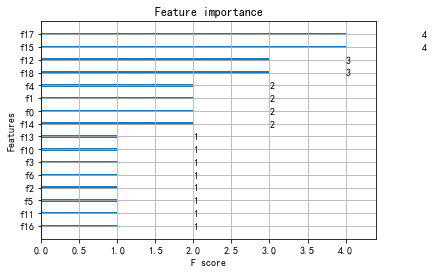

In [71]:
from xgboost import plot_importance # display importance of feature
plot_importance(bst1)
plt.show()

In [72]:
bst2 = XGBClassifier(max_depth = 2, n_estimators = num_round, silent = True, objective = 'binary:logistic')
bst2.fit(X_train, y_train)

train_prediction = bst2.predict(X_train)
y_prediction = bst2.predict(X_test)

print('Train accuracy: {:.3f}'.format(accuracy_score(y_train, train_prediction)))
print('Test accuracy: {:.3f}\n'.format(accuracy_score(y_test, y_prediction)))
print(classification_report(y_test, y_prediction))

confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, y_prediction))
confusion_matrix.columns = ['not buy [0]', 'buy [1]']
confusion_matrix.index = ['predict not buy [0]', 'predict buy [1]']
print('confusion matrix:\n ', confusion_matrix)

# 3-fold cross validation
acc_scores = cross_val_score(bst2, X_train, y_train, cv = 3)
print('\n3-fold cross validation:')
print(acc_scores)

Train accuracy: 0.888
Test accuracy: 0.887

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     99407
           1       0.70      0.17      0.27     14217

    accuracy                           0.89    113624
   macro avg       0.80      0.58      0.61    113624
weighted avg       0.87      0.89      0.86    113624

confusion matrix:
                       not buy [0]  buy [1]
predict not buy [0]        98358     1049
predict buy [1]            11795     2422

3-fold cross validation:
[0.88766458 0.88846547 0.88833345]


### Problem 3-b&emsp;

<font face="Calibri"> 
<font size=4, color = blue>Boss: We could, but we do not use Naive Bayes or Support Vector Machine in this project.</font>

**<font size=4, face="Calibri">Answer:</font>**
<font size=4, face="Calibri"> True. Reasons are as follows.<br/>
</font>

<font size=4, face="Calibri">
**<font color='red'>Why do we not use Naive Bayes in this project?</font>** <br/>
Because Naive Bayes model assumes that attributes are independent from each other, this assumption is often not valid in practical applications. When the correlation between attributes is large, the result of classification is not good.
In this project, whether the users will purchased in the future is correlated with their past behaviors. Meanwhile, we need to know the prior probability, which usually depends on the assumption.
</font>

<font size=4, face="Calibri">
**<font color='red'>Why do we not use Support Vector Machine in this project?</font>** <br/>
If we use linear SVM, the data of users' purchasing behavior may be linearly indivisible. If we use kernel trick, it may be overfitting.
Moreover, finding the best model requires us to test different combinations of kernel functions and model parameters.<br/> 
When the sample data is very large, the process of training is very time-consuming, which will also consume a lot of memory.
</font>

## Problem 4&emsp;Tune your model and report the best metrics you could get for your model and the corresponding confusion matrix and model name. At least Adaboost and Random Forest should be used for tuning.

<font size=4, face="Calibri">
d. Try to not record the # of orders for each user. Record whether he bought the goods instead, 1 if he bought and 0 otherwise.
</font>

In [73]:
dataset = np.array(user_date_table)
X, Y = dataset[:,0:19], dataset[:,19] 
X[X > 0] = 1
y = Y
y[y > 0] = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42) # test_size = 0.25 (default)

<font size=4, face="Calibri">
a. Try to do oversampling or undersampling. This is an imbalanced classification problem.
</font>

### <font color='red'>To be continued...

In [74]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids

X_resampled_over, y_resampled_over = SMOTE().fit_sample(X_train, y_train)

X_resampled_under, y_resampled_under = ClusterCentroids().fit_sample(X_train, y_train)

<font size=5, font='Calibri'>
**<font color='blue'>Adaboost</font>**

In [76]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score

# default_model = AdaBoostClassifier(base_estimator = None, n_estimators = 50, learning_rate = 1.0, algorithms = 'SAMME.R', random_state=None)
# learning rate: if too large, it is easy to miss the optimal value; if too small, the convergence speed will be very slow
# algorithms = 'SAMME.R' or 'SAMME'

AdaBoost_clf = AdaBoostClassifier()    
param_test = {'n_estimators': list(range(20, 71))}
clf = GridSearchCV(AdaBoost_clf, param_grid = param_test, scoring = 'f1', cv = 3)
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
test_f1 = f1_score(y_test, y_preds)

print('f1 scoce: {:.3f}'.format(test_f1))
print('confusion matrix:\n', metrics.confusion_matrix(y_test, y_preds))
print('The best f1 score: {:.3f}'.format(clf.best_score_))
print('The best measure：', clf.best_estimator_)  # get the classification model for the best measure

f1 scoce: 0.337
confusion matrix:
 [[97601  1806]
 [10970  3247]]
The best f1 score: 0.347
The best measure： AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=21, random_state=None)


<font size=5, face="Calibri">
**<font color='blue'>Random Forest</font>**

In [77]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score

# default model
# n_estimators = 10, criterion='gini', max_depth = None, min_samples_split = 2, min_samples_leaf = 1, min_weight_fraction_leaf = 0.0,
# max_features = 'auto', max_leaf_nodes = None, min_impurity_decrease = 0.0, min_impurity_split = None, 
# bootstrap = True, oob_score = False, n_jobs = 1, random_state = None, verbose = 0, warm_start = False, class_weight = None

random_forest_clf = RandomForestClassifier()
param_test = {'n_estimators': list(range(5, 16))}
clf = GridSearchCV(random_forest_clf, param_grid = param_test, scoring = 'f1', cv = 3)
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
test_f1 = f1_score(y_test, y_preds)

print('f1 scoce: {:.3f}'.format(test_f1))
print('confusion matrix:\n', metrics.confusion_matrix(y_test, y_preds))
print('The best f1 score: {:.3f}'.format(clf.best_score_))
print('The best measure：', clf.best_estimator_)  # get the classification model for the best measure

f1 scoce: 0.333
confusion matrix:
 [[96645  2762]
 [10823  3394]]
The best f1 score: 0.333
The best measure： RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=13,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


<font size=5, face="Calibri">
**<font color='blue'>Xgboost</font>**

In [78]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score

# params = {'max_depth': 2, 'eta': 0.1, 'silent': 1, 'objective': 'binary:logistic' }
bst = XGBClassifier(max_depth = 2, learning_rate = 0.1, silent = True, objective = 'binary:logistic')
param_test = {'n_estimators': list(range(100, 141, 1))}
clf = GridSearchCV(estimator = bst, param_grid = param_test, scoring = 'f1', cv = 3)
clf.fit(X_train, y_train) 
y_preds = clf.predict(X_test)
test_f1 = f1_score(y_test, y_preds)

print('f1 scoce: {:.3f}'.format(test_f1))
print('confusion matrix:\n', metrics.confusion_matrix(y_test, y_preds))
print('The best f1 score: {:.3f}'.format(clf.best_score_))
print('The best measure：', clf.best_estimator_)  # get the classification model for the best measure

f1 scoce: 0.336
confusion matrix:
 [[97667  1740]
 [11000  3217]]
The best f1 score: 0.341
The best measure： XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=137, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, silent=True, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)


<font size=4, face="Calibri">
e. Try to record the active-user feature. Many users did not only buy one cup of drink during two days, so whether one user is active should be taken into consideration.
</font>

In [79]:
user_date_table_temp = pd.DataFrame(np.array(user_date_table), index = user_date_table.index, columns = [str(i) for i in range(1,21)])
user_date_table_temp.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
phone_no,,,,,,,,,,,,,,,,,,,,
51379898,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
62288158,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1
65310185,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
67443044,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
67469370,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [80]:
active_state = user_date_table_temp.index.isin(active_users['phone_no']) # array of True and False
active_state = active_state.astype(int) # array of 1 and 0
active_state = pd.DataFrame(active_state, index = user_date_table.index, columns = ['active-user'])

user_date_active_table = pd.concat([active_state, user_date_table_temp], axis = 1)
user_date_active_table.head()

,active-user,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
phone_no,,,,,,,,,,,,,,,,,,,,,
51379898,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62288158,1,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,1,0,0,1
65310185,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
67443044,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67469370,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
dataset_new = np.array(user_date_active_table)

In [82]:
X, Y = dataset_new[:,0:20], dataset_new[:,20]

In [83]:
y = Y
X[X > 0] = 1
y[y > 0] = 1

In [84]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [85]:
y

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

### <font color='red'>To be continued...

<font size=4, face="Calibri">
f. Split the data with respect to Weekdays and Weekends and train two different models.
</font>

### <font color='red'>To be continued...

## Problem 5&emsp;After tuning, try to explain why your model works better.

<font size=4, face="Calibri">
Hint: For every case you try in Problem 4, please record the result and the trend. Does the model behave better or worse? <br/>The performances will show you the hidden information of the data and you could use business intuition to explain the phenomenons. <br/>
    That is the answer of Problem 5.
</font>

### <font color='red'>To be continued...

<font size=4, face="Calibri">
Indeed, tuning models is the most difficult problem of this project and it is very time-consuming since there are many cases for us to consider. Frankly speaking, I am not very familiar with some models and I still have a long way to go.
</font>